In [3]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [5]:
"""
This notebook illustrates time series decomposition by the statsmodels package.
Both additive and multiplicative models are demonstrated.
"""

'\nThis notebook illustrates time series decomposition by the statsmodels package.\nBoth additive and multiplicative models are demonstrated.\n'

In [6]:
"""
Let us demonstrate the addtive model using Wisconsin Employment
Jan. 1961 – OCt. 1975 dataset.
"""

'\nLet us demonstrate the addtive model using Wisconsin Employment\nJan. 1961 – OCt. 1975 dataset.\n'

In [7]:
#read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']

In [8]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


In [9]:
#Let's see first 10 rows of it
wisc_emp.head(10)

,Month,Employment
Month,,
1961-01,1961-01,239.6
1961-02,1961-02,236.4
1961-03,1961-03,236.8
1961-04,1961-04,241.5
1961-05,1961-05,243.7
1961-06,1961-06,246.1
1961-07,1961-07,244.1
1961-08,1961-08,244.2
1961-09,1961-09,244.8


In [10]:
#Check for missing values and remove the row
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp['Month']))
print('Number of missing values found:', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [11]:
#Run ADF test on the original time series
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')

In [13]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.9810000189539198


A high p-value of 0.9810 for the ADF test on the monthly employment series indicates that the original time series is non-stationary

In [15]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='additive')

<IPython.core.display.Javascript object>


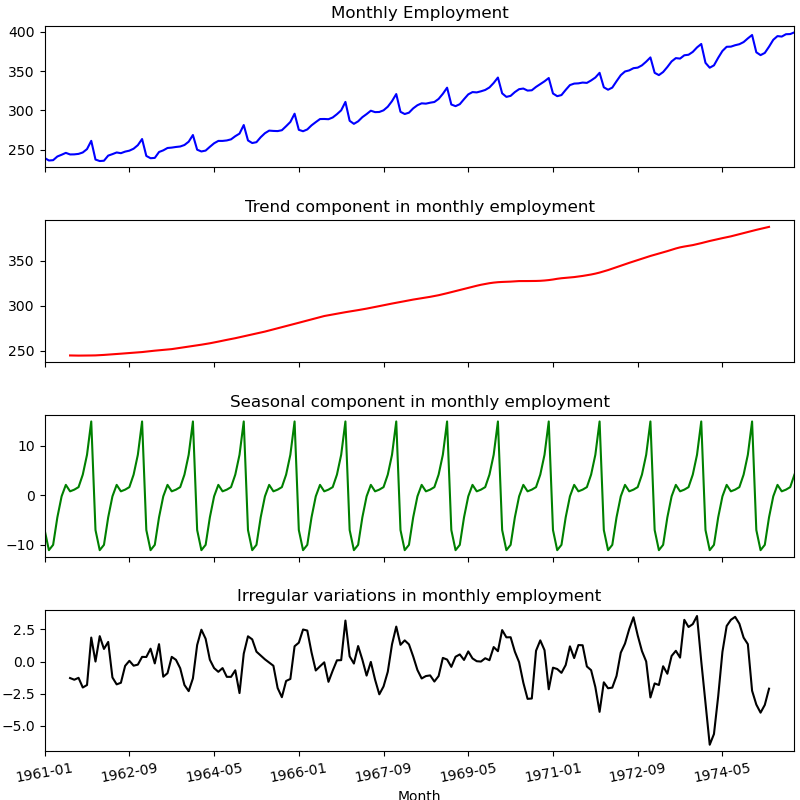

In [16]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8,8)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

# plt.savefig('plots/ch2/B07887_02_22.png', format='png', dpi=300)
plt.show()

In [17]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [18]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.006560931634640984


In [15]:
"""
The additive decompostion has been able to reduce the p-value
from 0.98 in case of the original time series
to 0.066 after decomposing.
"""

'\nThe additive decompostion has been able to reduce the p-value\nfrom 0.98 in case of the original time series\nto 0.066 after decomposing.\n'

In [16]:
"""
Now we will attempt decomposition of the original time
using a multiplicative model
"""

'\nNow we will attempt decomposition of the original time\nusing a multiplicative model\n'

In [19]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='multiplicative')

<IPython.core.display.Javascript object>


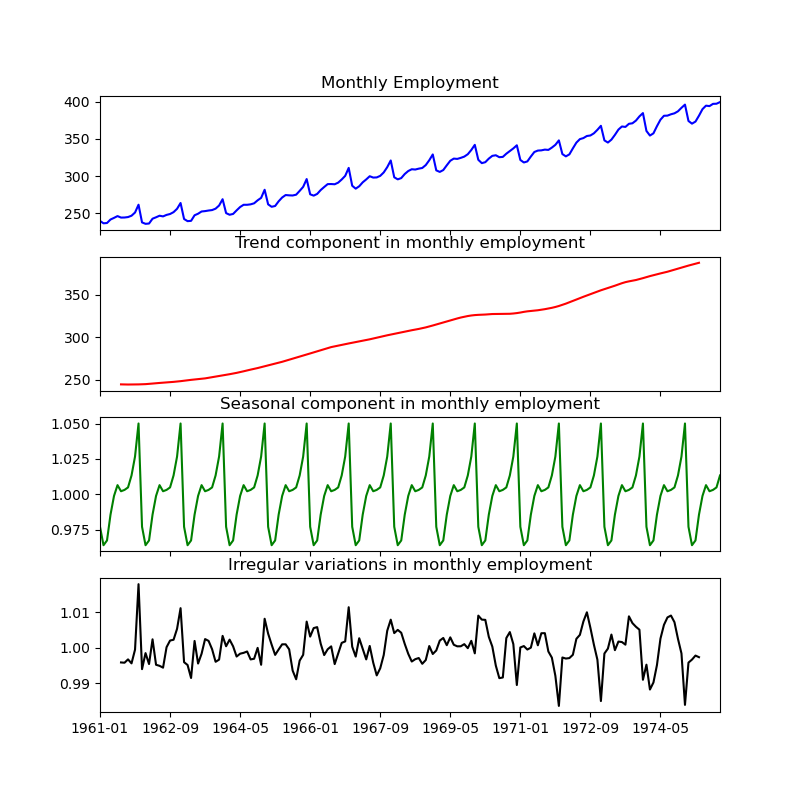

In [20]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8,8)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

# plt.savefig('plots/ch2/B07887_02_23.png', format='png', dpi=300)
plt.show()

In [21]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [22]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.0012347837267736824


In [21]:
"""
Voila! The p-val has further reduced 0.00123.
The null hypothesis about non-stationarity of the irregular variations
can be rejected at even a level of confidence of 99 % (alpha=0.01).
This shows that the original time series has been de-stationarized to
the stationary irregular variations. Besides we have estimates of both trend-cycle
and seasonal components.
"""

'\nVoila! The p-val has further reduced 0.00123.\nThe null hypothesis about non-stationarity of the irregular variations\ncan be rejected at even a level of confidence of 99 % (alpha=0.01).\nThis shows that the original time series has been de-stationarized to\nthe stationary irregular variations. Besides we have estimates of both trend-cycle\nand seasonal components.\n'